<a href="https://colab.research.google.com/github/Joovvhan/korean-stt/blob/master/kang/basic.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
#Gradient
import tensorflow as tf
import numpy as np


x = tf.placeholder(tf.float32, shape=())
y = x*x + tf.sin(x)
g = tf.gradients(y,x)

sess = tf.Session()

print(sess.run(g, {x:0.0}))
print(sess.run(g, {x:np.pi}))

[1.0]
[5.2831855]


In [0]:
import torch
x_train = torch.FloatTensor([[1], [2], [3]])
y_train = torch.FloatTensor([[2], [4], [6]])

W = torch.zeros(1, requires_grad=True)
b = torch.zeros(1, requires_grad=True)

optimizer = torch.optim.SGD([W,b], lr=0.01)

nb_epochs = 1000

for epoch in range(1, nb_epochs + 1):
  hypothesis = x_train * W + b
  cost = torch.mean((hypothesis - y_train) ** 2)
  optimizer.zero_grad()
  cost.backward()
  optimizer.step()

In [14]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim

print(torch.sigmoid(torch.FloatTensor([1, 3])))

tensor([0.7311, 0.9526])


Tensor("Conv2D_10:0", shape=(1, 400, 400, 64), dtype=float32)


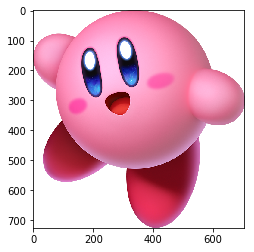

In [25]:
import tensorflow as tf
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt
import requests
from io import BytesIO
%matplotlib inline

batch_size = 1
img_height = 800
img_width = 800
img_channel = 3

x = tf.placeholder(tf.float32, [batch_size, img_height, img_width, img_channel])
w = tf.Variable(tf.random_normal([5,5,3,64], stddev=0.35))
b = tf.Variable(tf.random_normal([5,5,3,64], stddev=0.35))
output = tf.nn.conv2d(x,w,strides=[1,2,2,1], padding='SAME')
print(output)

sess=tf.Session()

with tf.Session() as sses:
  tf.global_variables_initializer().run()
  res = requests.get('http://www.nintendo.co.kr/software/switch/ah26a/assets/images/top/visual_chara08.png')
  img = np.array(Image.open(BytesIO(res.content)))
  plt.imshow(img)
  plt.show()

In [40]:
print(tf.random_normal([5,5,3,64], stddev=0.35))
b = tf.Variable(tf.random_normal([64], stddev=0.35))
c = tf.nn.conv2d(x,w,strides=[1,1,1,1], padding='SAME')+b
c = tf.nn.relu(c)
h = tf.nn.max_pool(c,[1,2,2,1], strides=[1,2,2,1],padding='SAME')
print(h)

Tensor("random_normal_39:0", shape=(5, 5, 3, 64), dtype=float32)
Tensor("MaxPool_13:0", shape=(1, 400, 400, 64), dtype=float32)


In [47]:
h = tf.reshape(h, [batch_size, -1])
print(h)
fc_w = tf.Variable(tf.random_normal([int(h.get_shape()[1]), 10], stddev=0.35))
fc_b = tf.Variable(tf.random_normal([10], stddev=0.35))
print(fc_w)
print(fc_b)
output = tf.matmul(h, fc_w) + fc_b
print(output)
output = tf.nn.softmax(output)
print(output)

Tensor("Reshape_6:0", shape=(1, 10240000), dtype=float32)
<tf.Variable 'Variable_34:0' shape=(10240000, 10) dtype=float32_ref>
<tf.Variable 'Variable_35:0' shape=(10,) dtype=float32_ref>
Tensor("add_18:0", shape=(1, 10), dtype=float32)
Tensor("Softmax_4:0", shape=(1, 10), dtype=float32)
